# Lec8,9 - scikit-learn

Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities.


* Collection of machine learning algorithms and tools for predictive data analysis
* Built on NumPy, SciPy, and matplotlib
* Open source, commercially usable - BSD license

https://scikit-learn.org/stable/

https://scikit-learn.org/stable/tutorial/index.html

https://github.com/koaning/calm-notebooks



## Contents:
1. Dataset Loading
2. Linear Regression
3. Classification
4. Multilayer Perceptron
5. LinearSVM
6. Random Forest

In [ ]:
!pip install scikit-learn

## 1. Linear Regression
The example below uses only the first feature of the `diabetes` dataset,
in order to illustrate the data points within the two-dimensional plot.
The straight line can be seen in the plot, showing how linear regression
attempts to draw a straight line that will best minimize the
residual sum of squares between the observed responses in the dataset,
and the responses predicted by the linear approximation.

The coefficients, residual sum of squares and the coefficient of
determination are also calculated.


* Datasets : Diabetes

## Pipeline
- model = scaling+regressionModel
- pipeline.fit()
- pipeline.predict()
https://scikit-learn.org/stable/datasets/toy_dataset.html


In [22]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)

In [23]:
print(load_diabetes()['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [24]:
from sklearn.linear_model import LinearRegression
X, y = load_diabetes(return_X_y=True)

mod = LinearRegression()
mod.fit(X, y)
mod.predict(X)[:3]

array([206.11667725,  68.07103297, 176.88279035])

In [25]:
from sklearn.neighbors import KNeighborsRegressor
mod = KNeighborsRegressor()
mod.fit(X, y)
mod.predict(X)[:3]

array([181.4,  80.8, 150.8])

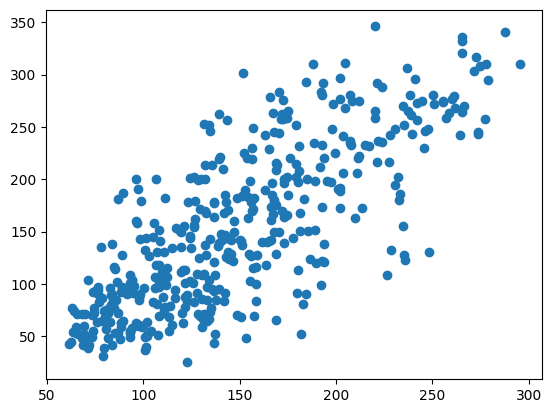

In [26]:
import matplotlib.pylab as plt

X, y = load_diabetes(return_X_y=True)

mod = KNeighborsRegressor().fit(X, y)
pred = mod.predict(X)
plt.scatter(pred, y)

In [27]:
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.datasets import load_diabetes
#import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X, y = load_diabetes(return_X_y=True)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])

pipe.fit(X, y)

pred = pipe.predict(X)

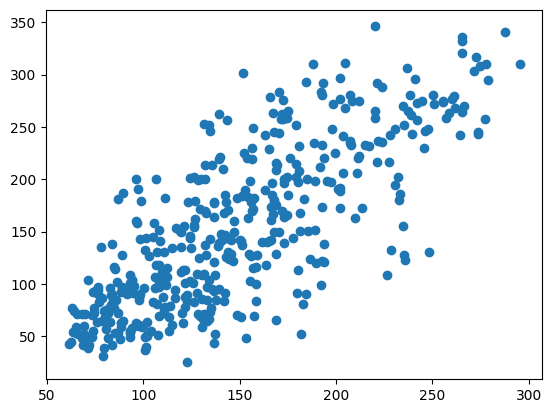

In [28]:
plt.scatter(pred, y)

In [29]:
X, y = load_diabetes(return_X_y=True)

In [30]:
# If n_neighbors = 1, we're totally cheating with the chart below.
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])

In [31]:
pipe.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsRegressor(n_neighbors=1))])

In [32]:
pred = pipe.predict(X)

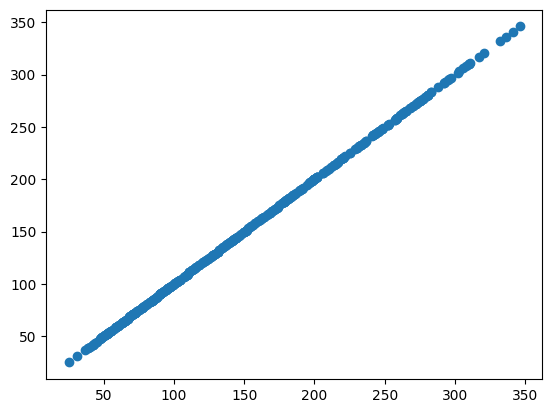

In [33]:
plt.scatter(pred, y)

### Let's now use a gridsearch!
- cross validation
- 3-fold
- gridsearchCV.fit
- gridsearchCV.predict

In [35]:
#from sklearn.datasets import load_diabetes
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd

mod = GridSearchCV(estimator=pipe,
                 param_grid={
                   'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
                 },
                 cv=3)
mod.fit(X, y);

In [36]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006086,0.002823,0.005385,0.003848,1,{'model__n_neighbors': 1},0.105976,0.124092,-0.158523,0.023849,0.129168,10
1,0.002777,0.001285,0.004829,0.001631,2,{'model__n_neighbors': 2},0.268889,0.339379,0.264563,0.290944,0.034295,9
2,0.000000,0.000000,0.005182,0.003819,3,{'model__n_neighbors': 3},0.333057,0.382744,0.356899,0.357567,0.020290,8
3,0.004689,0.003431,0.003507,0.003448,4,{'model__n_neighbors': 4},0.342407,0.404701,0.409910,0.385673,0.030668,6
4,0.005928,0.007687,0.000000,0.000000,5,{'model__n_neighbors': 5},0.358865,0.377198,0.412549,0.382871,0.022280,7
5,0.005213,0.007372,0.000000,0.000000,6,{'model__n_neighbors': 6},0.372665,0.389923,0.436389,0.399659,0.026911,5
6,0.000000,0.000000,0.000000,0.000000,7,{'model__n_neighbors': 7},0.412584,0.393681,0.446147,0.417471,0.021696,4
7,0.005352,0.004854,0.002835,0.002016,8,{'model__n_neighbors': 8},0.414478,0.409779,0.485850,0.436702,0.034806,3
8,0.000000,0.000000,0.005208,0.007366,9,{'model__n_neighbors': 9},0.414191,0.412035,0.528462,0.451563,0.054383,2
9,0.000000,0.000000,0.005206,0.007363,10,{'model__n_neighbors': 10},0.408989,0.405303,0.544371,0.452888,0.064706,1


### preprocessing


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [ ]:
df = pd.read_csv("lec9_data1.csv")

In [ ]:
df.head(3)


In [ ]:
X = df[['x', 'y']].values
y = df['z'] == "a"

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y);

In [ ]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline 

X_new = QuantileTransformer(n_quantiles=100).fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y);

In [ ]:
def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(X, y).predict(X)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)), 
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")
#     plt.scatter(pred[:, 0], pred[:, 1], c=y_proba[:, 1], alpha=0.7)
#     plt.title("Predicted Data")

In [ ]:
plot_output(scaler=StandardScaler())


In [ ]:
plot_output(scaler=QuantileTransformer(n_quantiles=100))

### Non-linear classification

In [ ]:
df = pd.read_csv("lec9_data2.csv")
X = df[['x', 'y']].values
y = df['z'] == 'a'
plt.scatter(X[:, 0], X[:, 1], c=y);

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", QuantileTransformer(n_quantiles=100)),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred);

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", PolynomialFeatures()),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred);

In [ ]:
arr = np.array(["low", "low", "high", "medium"]).reshape(-1, 1)
arr

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit_transform(arr)

In [ ]:
enc.transform([["zero"]])